In [1]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
from legendgram import legendgram
import seaborn as sns

In [19]:
df = pd.read_csv('LFB 2019 Incident data.csv')
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")
# Look into the data
df.head(5)

Data frame is 105,008 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,209488,000287-01012019,2019/1/1,2019,2:39:50 AM,2,False Alarm,AFA,NaN,Dwelling,...,Peckham,356.0,New Cross,655.0,Greenwich,2.0,2.0,2.0,1.0,333.0
1,209489,000175-01012019,2019/1/1,2019,1:04:04 AM,1,Fire,Secondary Fire,NaN,Outdoor Structure,...,Feltham,460.0,Feltham,NaN,NaN,1.0,1.0,1.0,1.0,333.0
2,209490,000159-01012019,2019/1/1,2019,12:54:41 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,Southall,241.0,Southall,NaN,NaN,1.0,1.0,1.0,1.0,333.0
3,209491,000610-01012019,2019/1/1,2019,8:29:28 PM,20,Fire,Secondary Fire,NaN,Outdoor Structure,...,Peckham,273.0,New Cross,NaN,NaN,1.0,1.0,1.0,1.0,333.0
4,209492,000630-01012019,2019/1/1,2019,9:27:27 PM,21,False Alarm,False alarm - Good intent,NaN,Dwelling,...,Poplar,284.0,Poplar,516.0,Millwall,2.0,2.0,2.0,1.0,333.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105008 entries, 0 to 105007
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              105008 non-null  int64  
 1   IncidentNumber                          105008 non-null  object 
 2   DateOfCall                              105008 non-null  object 
 3   CalYear                                 105008 non-null  int64  
 4   TimeOfCall                              105008 non-null  object 
 5   HourOfCall                              105008 non-null  int64  
 6   IncidentGroup                           105008 non-null  object 
 7   StopCodeDescription                     105008 non-null  object 
 8   SpecialServiceType                      33039 non-null   object 
 9   PropertyCategory                        105008 non-null  object 
 10  PropertyType                            1050

In [21]:
df_IncidentGroup=df.drop_duplicates(subset='IncidentGroup')
df_IncidentGroup.IncidentGroup

0        False Alarm
1               Fire
5    Special Service
Name: IncidentGroup, dtype: object

In [22]:
df_FalseAlarm = df[df.IncidentGroup=='False Alarm']
print(f"Data frame is {df_FalseAlarm .shape[0]:,} x {df_FalseAlarm .shape[1]}")
# See the filtered data
df_FalseAlarm.head(5)

Data frame is 53,985 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,209488,000287-01012019,2019/1/1,2019,2:39:50 AM,2,False Alarm,AFA,NaN,Dwelling,...,Peckham,356.0,New Cross,655.0,Greenwich,2.0,2.0,2.0,1.0,333.0
4,209492,000630-01012019,2019/1/1,2019,9:27:27 PM,21,False Alarm,False alarm - Good intent,NaN,Dwelling,...,Poplar,284.0,Poplar,516.0,Millwall,2.0,2.0,2.0,1.0,333.0
6,209494,000453-01012019,2019/1/1,2019,1:38:15 PM,13,False Alarm,AFA,NaN,Dwelling,...,Paddington,262.0,Paddington,329.0,Kensington,2.0,2.0,2.0,1.0,333.0
7,209495,000495-01012019,2019/1/1,2019,3:47:01 PM,15,False Alarm,AFA,NaN,Dwelling,...,Forest Hill,232.0,Forest Hill,495.0,West Norwood,4.0,5.0,5.0,2.0,666.0
8,209496,000571-01012019,2019/1/1,2019,5:56:44 PM,17,False Alarm,AFA,NaN,Dwelling,...,New Malden,300.0,Surbiton,NaN,NaN,1.0,1.0,1.0,1.0,333.0


In [23]:
df_SpecialService = df[df.IncidentGroup=='Special Service']
print(f"Data frame is {df_SpecialService .shape[0]:,} x {df_SpecialService .shape[1]}")
# See the filtered data
df_SpecialService.head(5)

Data frame is 33,041 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
5,209493,000577-01012019,2019/1/1,2019,6:16:05 PM,18,Special Service,Special Service,Assist other agencies,Dwelling,...,Wallington,382.0,Wallington,424.0,Croydon,2.0,2.0,2.0,4.0,1332.0
12,209500,000540-01012019,2019/1/1,2019,4:29:30 PM,16,Special Service,Special Service,Advice Only,Dwelling,...,Shadwell,288.0,Whitechapel,NaN,NaN,1.0,1.0,1.0,1.0,333.0
19,209507,000642-01012019,2019/1/1,2019,10:08:32 PM,22,Special Service,Special Service,Making Safe (not RTC),Dwelling,...,Leytonstone,120.0,Leytonstone,NaN,NaN,1.0,1.0,1.0,1.0,333.0
21,209509,000250-01012019,2019/1/1,2019,1:47:29 AM,1,Special Service,Special Service,RTC,Road Vehicle,...,Croydon,24.0,Croydon,NaN,NaN,1.0,1.0,1.0,1.0,333.0
22,209510,000605-01012019,2019/1/1,2019,8:08:15 PM,20,Special Service,Special Service,Spills and Leaks (not RTC),Dwelling,...,Norbury,260.0,Norbury,NaN,NaN,1.0,1.0,1.0,1.0,333.0


In [24]:
df_fire = df[df.IncidentGroup=='Fire']
print(f"Data frame is {df_fire .shape[0]:,} x {df_fire .shape[1]}")
# See the filtered data
df_fire.head(5)

Data frame is 17,982 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
1,209489,000175-01012019,2019/1/1,2019,1:04:04 AM,1,Fire,Secondary Fire,NaN,Outdoor Structure,...,Feltham,460.0,Feltham,NaN,NaN,1.0,1.0,1.0,1.0,333.0
2,209490,000159-01012019,2019/1/1,2019,12:54:41 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,Southall,241.0,Southall,NaN,NaN,1.0,1.0,1.0,1.0,333.0
3,209491,000610-01012019,2019/1/1,2019,8:29:28 PM,20,Fire,Secondary Fire,NaN,Outdoor Structure,...,Peckham,273.0,New Cross,NaN,NaN,1.0,1.0,1.0,1.0,333.0
11,209499,000487-01012019,2019/1/1,2019,3:24:32 PM,15,Fire,Secondary Fire,NaN,Outdoor,...,Dowgate,219.0,Dowgate,NaN,NaN,1.0,1.0,1.0,1.0,333.0
16,209504,000123-01012019,2019/1/1,2019,12:35:27 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,New Malden,415.0,Kingston,503.0,Twickenham,2.0,2.0,2.0,1.0,333.0


<AxesSubplot:title={'center':'Number of Incident Categories 2019'}, ylabel='PropertyCategory'>

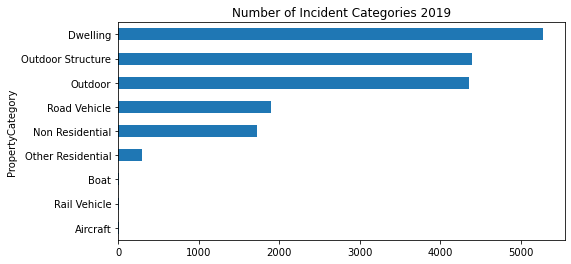

In [25]:
df_fire.groupby(['PropertyCategory']).size().sort_values().plot(kind='barh', figsize=[8,4], title='Number of Incident Categories 2019')


PropertyCategory

In [13]:
df_PropertyCategory=df_fire.drop_duplicates(subset='PropertyCategory')
df_PropertyCategory.PropertyCategory

1        Outdoor Structure
2                  Outdoor
17         Non Residential
48            Road Vehicle
55                Dwelling
129      Other Residential
4272          Rail Vehicle
10404                 Boat
50783             Aircraft
Name: PropertyCategory, dtype: object

In [14]:
df_Dwelling = df_fire[df_fire.PropertyCategory=='Dwelling']
print(f"Data frame is {df_Dwelling .shape[0]:,} x {df_Dwelling .shape[1]}")
# See the filtered data
df_Dwelling.head(5)

Data frame is 5,281 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
55,209543,000501-01012019,2019/1/1,2019,4:02:02 PM,16,Fire,Primary Fire,NaN,Dwelling,...,North Kensington,181.0,North Kensington,374.0,West Hampstead,3.0,4.0,6.0,19.0,6327.0
89,209577,000200-01012019,2019/1/1,2019,1:15:12 AM,1,Fire,Primary Fire,NaN,Dwelling,...,Southall,357.0,Southall,529.0,Northolt,2.0,2.0,2.0,2.0,666.0
134,209622,000466-01012019,2019/1/1,2019,2:17:38 PM,14,Fire,Primary Fire,NaN,Dwelling,...,Holloway,203.0,Holloway,254.0,Hornsey,2.0,2.0,2.0,1.0,333.0
169,209657,000611-01012019,2019/1/1,2019,8:30:09 PM,20,Fire,Primary Fire,NaN,Dwelling,...,Enfield,346.0,Enfield,NaN,NaN,1.0,1.0,1.0,1.0,333.0
189,209677,000257-01012019,2019/1/1,2019,1:52:37 AM,1,Fire,Primary Fire,NaN,Dwelling,...,Old Kent Road,125.0,Dockhead,261.0,Dockhead,7.0,7.0,7.0,3.0,999.0


In [10]:
df_Dwelling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5057 entries, 3 to 98559
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              5057 non-null   int64  
 1   IncidentNumber                          5057 non-null   object 
 2   DateOfCall                              5057 non-null   object 
 3   CalYear                                 5057 non-null   int64  
 4   TimeOfCall                              5057 non-null   object 
 5   HourOfCall                              5057 non-null   int64  
 6   IncidentGroup                           5057 non-null   object 
 7   StopCodeDescription                     5057 non-null   object 
 8   SpecialServiceType                      0 non-null      object 
 9   PropertyCategory                        5057 non-null   object 
 10  PropertyType                            5057 non-null   obj

In [15]:
df_Dwelling.to_csv('Dwelling 2019 Incident data.csv')

In [16]:
df_OutdoorStructure = df_fire[df_fire.PropertyCategory=='Outdoor Structure']
print(f"Data frame is {df_OutdoorStructure .shape[0]:,} x {df_OutdoorStructure .shape[1]}")
# See the filtered data
df_OutdoorStructure.head(5)

Data frame is 4,393 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
1,209489,000175-01012019,2019/1/1,2019,1:04:04 AM,1,Fire,Secondary Fire,NaN,Outdoor Structure,...,Feltham,460.0,Feltham,NaN,NaN,1.0,1.0,1.0,1.0,333.0
3,209491,000610-01012019,2019/1/1,2019,8:29:28 PM,20,Fire,Secondary Fire,NaN,Outdoor Structure,...,Peckham,273.0,New Cross,NaN,NaN,1.0,1.0,1.0,1.0,333.0
25,209513,000397-01012019,2019/1/1,2019,9:43:36 AM,9,Fire,Secondary Fire,NaN,Outdoor Structure,...,Brixton,149.0,Brixton,NaN,NaN,1.0,1.0,1.0,1.0,333.0
27,209515,000289-01012019,2019/1/1,2019,2:42:52 AM,2,Fire,Secondary Fire,NaN,Outdoor Structure,...,Plaistow,401.0,East Ham,NaN,NaN,1.0,1.0,1.0,1.0,333.0
29,209517,000362-01012019,2019/1/1,2019,6:26:42 AM,6,Fire,Secondary Fire,NaN,Outdoor Structure,...,Shoreditch,238.0,Shoreditch,366.0,Islington,2.0,2.0,2.0,1.0,333.0


In [17]:
df_Outdoor = df_fire[df_fire.PropertyCategory=='Outdoor']
print(f"Data frame is {df_Outdoor.shape[0]:,} x {df_Outdoor.shape[1]}")
# See the filtered data
df_Outdoor.head(5)

Data frame is 4,355 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
2,209490,000159-01012019,2019/1/1,2019,12:54:41 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,Southall,241.0,Southall,NaN,NaN,1.0,1.0,1.0,1.0,333.0
11,209499,000487-01012019,2019/1/1,2019,3:24:32 PM,15,Fire,Secondary Fire,NaN,Outdoor,...,Dowgate,219.0,Dowgate,NaN,NaN,1.0,1.0,1.0,1.0,333.0
16,209504,000123-01012019,2019/1/1,2019,12:35:27 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,New Malden,415.0,Kingston,503.0,Twickenham,2.0,2.0,2.0,1.0,333.0
20,209508,000203-01012019,2019/1/1,2019,1:16:37 AM,1,Fire,Secondary Fire,NaN,Outdoor,...,Willesden,334.0,Willesden,NaN,NaN,1.0,1.0,1.0,1.0,333.0
61,209549,000104-01012019,2019/1/1,2019,12:22:43 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,Erith,225.0,Erith,NaN,NaN,1.0,1.0,1.0,1.0,333.0


In [18]:
df_Outdoor = df_fire[(df_fire.PropertyCategory=='Outdoor') | (df_fire.PropertyCategory=='Outdoor Structure')]
print(f"Data frame is {df_Outdoor.shape[0]:,} x {df_Outdoor.shape[1]}")
# See the filtered data
df_Outdoor.head(5)


Data frame is 8,748 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
1,209489,000175-01012019,2019/1/1,2019,1:04:04 AM,1,Fire,Secondary Fire,NaN,Outdoor Structure,...,Feltham,460.0,Feltham,NaN,NaN,1.0,1.0,1.0,1.0,333.0
2,209490,000159-01012019,2019/1/1,2019,12:54:41 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,Southall,241.0,Southall,NaN,NaN,1.0,1.0,1.0,1.0,333.0
3,209491,000610-01012019,2019/1/1,2019,8:29:28 PM,20,Fire,Secondary Fire,NaN,Outdoor Structure,...,Peckham,273.0,New Cross,NaN,NaN,1.0,1.0,1.0,1.0,333.0
11,209499,000487-01012019,2019/1/1,2019,3:24:32 PM,15,Fire,Secondary Fire,NaN,Outdoor,...,Dowgate,219.0,Dowgate,NaN,NaN,1.0,1.0,1.0,1.0,333.0
16,209504,000123-01012019,2019/1/1,2019,12:35:27 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,New Malden,415.0,Kingston,503.0,Twickenham,2.0,2.0,2.0,1.0,333.0


In [19]:
df_Outdoor.to_csv('Outdoor 2019 Incident data.csv')

In [29]:
df_NonResidential = df_fire[df_fire.PropertyCategory=='Non Residential']
print(f"Data frame is {df_NonResidential.shape[0]:,} x {df_NonResidential.shape[1]}")
# See the filtered data
df_NonResidential.head(5)

Data frame is 1,456 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
95,314591,000078-01012020,2020/1/1,2020,1:11:13 AM,1,Fire,Primary Fire,NaN,Non Residential,...,Hendon,267.0,Hendon,NaN,NaN,1.0,2.0,2.0,2.0,678.0
188,314684,000003-01012020,2020/1/1,2020,12:06:30 AM,0,Fire,Primary Fire,NaN,Non Residential,...,Hillingdon,324.0,Hillingdon,292.0,Hillingdon,1.0,2.0,2.0,1.0,339.0
200,314696,000449-01012020,2020/1/1,2020,7:26:43 PM,19,Fire,Primary Fire,NaN,Non Residential,...,Walthamstow,250.0,Walthamstow,253.0,Walthamstow,1.0,2.0,2.0,2.0,678.0
267,314763,000162-01012020,2020/1/1,2020,3:51:20 AM,3,Fire,Primary Fire,NaN,Non Residential,...,Surbiton,285.0,Surbiton,429.0,New Malden,2.0,2.0,2.0,4.0,1356.0
365,314861,000603-02012020,2020/1/2,2020,8:29:16 AM,8,Fire,Primary Fire,NaN,Non Residential,...,Dagenham,292.0,Dagenham,330.0,Dagenham,1.0,2.0,2.0,1.0,339.0


In [31]:
df_OtherResidential = df_fire[df_fire.PropertyCategory=='Other Residential']
print(f"Data frame is {df_OtherResidential.shape[0]:,} x {df_OtherResidential.shape[1]}")
# See the filtered data
df_OtherResidential.head(5)

Data frame is 233 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
180,314676,000361-01012020,2020/1/1,2020,3:32:15 PM,15,Fire,Primary Fire,NaN,Other Residential,...,Hendon,181.0,Hendon,187.0,Hendon,1.0,2.0,2.0,1.0,339.0
204,314700,000390-01012020,2020/1/1,2020,4:32:17 PM,16,Fire,Primary Fire,NaN,Other Residential,...,Barking,194.0,Barking,272.0,East Ham,2.0,3.0,3.0,1.0,339.0
452,314948,000693-02012020,2020/1/2,2020,2:10:24 PM,14,Fire,Primary Fire,NaN,Other Residential,...,Kentish Town,161.0,Kentish Town,224.0,Kentish Town,2.0,3.0,3.0,1.0,339.0
1052,315548,002053-05012020,2020/1/5,2020,8:18:26 PM,20,Fire,Primary Fire,NaN,Other Residential,...,Holloway,217.0,Holloway,235.0,Islington,2.0,2.0,2.0,1.0,339.0
1148,315644,001809-05012020,2020/1/5,2020,8:48:00 AM,8,Fire,Primary Fire,NaN,Other Residential,...,Euston,219.0,Euston,320.0,Kentish Town,2.0,2.0,2.0,1.0,339.0


In [20]:
df_Residential = df_fire[(df_fire.PropertyCategory=='Other Residential') | (df_fire.PropertyCategory=='Non Residential')]
print(f"Data frame is {df_Residential.shape[0]:,} x {df_Residential.shape[1]}")
# See the filtered data
df_Residential.head(5)

Data frame is 2,022 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
17,209505,000665-01012019,2019/1/1,2019,11:29:17 PM,23,Fire,Primary Fire,NaN,Non Residential,...,Barking,340.0,Barking,NaN,NaN,1.0,1.0,1.0,1.0,333.0
37,209525,000469-01012019,2019/1/1,2019,2:25:54 PM,14,Fire,Primary Fire,NaN,Non Residential,...,Ilford,386.0,Ilford,NaN,NaN,1.0,1.0,1.0,2.0,666.0
81,209569,000061-01012019,2019/1/1,2019,12:11:32 AM,0,Fire,Primary Fire,NaN,Non Residential,...,Stanmore,369.0,Stanmore,486.0,Harrow,2.0,2.0,4.0,4.0,1332.0
120,209608,000331-01012019,2019/1/1,2019,5:01:51 AM,5,Fire,Primary Fire,NaN,Non Residential,...,Twickenham,455.0,Feltham,634.0,Heston,2.0,2.0,2.0,3.0,999.0
129,209617,000435-01012019,2019/1/1,2019,12:45:31 PM,12,Fire,Primary Fire,NaN,Other Residential,...,Bethnal Green,174.0,Bethnal Green,332.0,Shadwell,2.0,2.0,2.0,1.0,333.0


In [21]:
df_Residential.to_csv('Residential 2019 Incident data.csv')

In [22]:
df_transportation = df_fire[(df_fire.PropertyCategory=='Road Vehicle') | (df_fire.PropertyCategory=='Boat') | (df_fire.PropertyCategory=='Rail Vehicle')| (df_fire.PropertyCategory=='Aircraft')]
print(f"Data frame is {df_transportation.shape[0]:,} x {df_transportation.shape[1]}")
# See the filtered data
df_transportation.head(5)


Data frame is 1,931 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
48,209536,000082-01012019,2019/1/1,2019,12:17:10 AM,0,Fire,Primary Fire,NaN,Road Vehicle,...,Poplar,215.0,Bethnal Green,NaN,NaN,1.0,1.0,1.0,1.0,333.0
103,209591,000233-01012019,2019/1/1,2019,1:35:34 AM,1,Fire,Primary Fire,NaN,Road Vehicle,...,Ilford,361.0,Leytonstone,NaN,NaN,1.0,1.0,1.0,1.0,333.0
183,209671,000269-01012019,2019/1/1,2019,2:08:32 AM,2,Fire,Primary Fire,NaN,Road Vehicle,...,Stoke Newington,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,333.0
296,209784,000350-01012019,2019/1/1,2019,6:12:59 AM,6,Fire,Primary Fire,NaN,Road Vehicle,...,Feltham,113.0,Twickenham,NaN,NaN,1.0,1.0,1.0,1.0,333.0
297,209785,000349-01012019,2019/1/1,2019,6:12:39 AM,6,Fire,Primary Fire,NaN,Road Vehicle,...,Erith,351.0,Erith,NaN,NaN,1.0,1.0,1.0,1.0,333.0


In [23]:
df_transportation.to_csv('transportation 2019 Incident data.csv')